# HR analytics: Inferential statistics

Apply inferential statistics and hypothesis testing

Objectives:

Perform hypothesis testing for numeric and categorical data to identify statistical significance
Understand how hypothesis testing is applied in real-world applications such as A/B testing

If there is statistical significance between subgroups and their satisfaction level, we can further understand what the distinctions are and which characteristics result in more productivity or less satisfaction (satisfaction is probably the most signifcant variable in explaining)

Dataset found here: https://www.kaggle.com/giripujar/hr-analytics/data

In [1]:
# import necessary modules for data manipulation and visual representations
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read analytics csv file and store dataset into dataframe df
df = pd.read_csv('datasets_11142_15488_HR_comma_sep.csv', index_col=None)

In [3]:
# Rename columns for better understanding
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [4]:
# Move reponse variable "turnover" to front of the table -- easier to split into training/testing sets
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


# Summary statistics

In [5]:
# ~76% of employees stayed and 24% of employees left; when performing cross validation, important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [6]:
# overview of turnover vs non-turnover summary statistics
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [7]:
# overview of total summary statistics
df.mean()

turnover                 0.238083
satisfaction             0.612834
evaluation               0.716102
projectCount             3.803054
averageMonthlyHours    201.050337
yearsAtCompany           3.498233
workAccident             0.144610
promotion                0.021268
dtype: float64

# Statistical analysis

In [8]:
# split data into two groups: 

# Group 1 (employee turnover)
turnover_satisfactionDF = df[(df['turnover'] == 1)]

# Group 2 (employee non-turnover)
no_turnover_satisfactionDF = df[(df['turnover'] != 1)]

In [9]:
# Create variables

# Size of employee turnover
n1 = len(turnover_satisfactionDF)
# size of employee non-turnover
n2 = len(no_turnover_satisfactionDF)

# mean satisfaction of employee turnover
mean1 = turnover_satisfactionDF.mean()
# mean satisfaction of employee non-turnover
mean2 = no_turnover_satisfactionDF.mean()

# Histogram of both groups

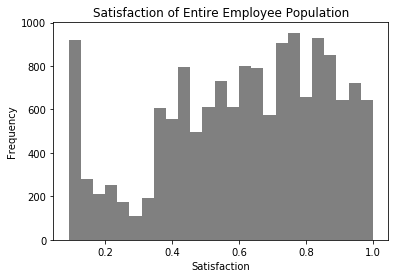

In [14]:
# Graph of entire employee population (employee turnover))
df["satisfaction"].plot(kind='hist',color='0.5', bins = 25, title = 'Satisfaction of Entire Employee Population').set_xlabel('Satisfaction')
st_100=round((df["satisfaction"]).std(),4)

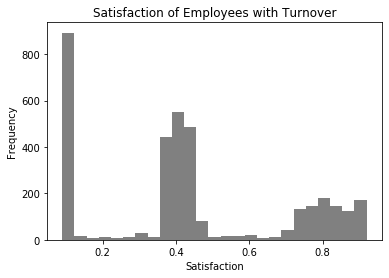

In [15]:
# Graph of employee turnover
turnover_satisfactionDF["satisfaction"].plot(kind='hist',color='0.5', bins = 25, title = 'Satisfaction of Employees with Turnover').set_xlabel('Satisfaction')
st_100=round((turnover_satisfactionDF["satisfaction"]).std(),4)

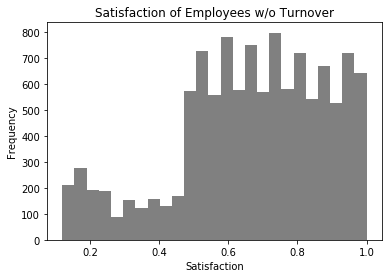

In [16]:
# Graph of employees without turnover
no_turnover_satisfactionDF["satisfaction"].plot(kind='hist',color='0.5', bins = 25, title = 'Satisfaction of Employees w/o Turnover').set_xlabel('Satisfaction')
st_100=round((no_turnover_satisfactionDF["satisfaction"]).std(),4)

# T-test

The T-test is a statistical test used to determine whether a numeric data sample differs significantly from the population, or whether two samples differ from each other.

One-sample T-test (measuring satisfaction)
A one-sample t-test checks whether a sample mean differs from the population mean. We'll test to see whether the average satisfaction of employees with turnover differs from the entire employee population.

Hypothesis testing: 
Is there a significant difference in the means of satisfaction between employees with turnover and the entire employee population?

Null Hypothesis: (H0: pTS = pES) 
The null hypothesis is that there is no difference in satisfaction between employees with turnover and the entire employee population.

Alternate Hypothesis: (HA: pTS != pES) 
The alternative hypothesis is that there is a difference in satisfaction between employees with turnover and the entire employee population.

In [18]:
# compare the means of employee turnover satisfaction against employee population satisfaction
emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees with turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.6128335222348166
The mean for the employees with turnover is: 0.44009801176140917


# Conduct T-Test

We'll conduct a t-test at the 95% confidence level and see if it correctly rejects the null hypothesis which is that the sample has the same distribution as the employee population. To conduct a one sample t-test, we'll use the stats.ttest_1samp() function:

In [19]:
import scipy.stats as stats

stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of employee satisfaction with turnover
                  popmean = emp_population_satisfaction)  # employee population satisfaction mean

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

The test result shows the test statistic "t" is equal to -39.109. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

In [21]:
degree_freedom = len(df[df['turnover']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # left quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # right quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9606285215955626
The t-distribution right quartile range is: 1.9606285215955621


The alternative hypothesis is the sample mean differs (is not equal to) from the population mean.

A p-value of 9.012781195378076e-279 means we expect to see data as extreme as our sample due to chance far less than 5% of the time if the null hypothesis is true. In this case, the p-value is lower than our significance level α (equal to 1-confidence level = 0.05) so we reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture the employee population satisfaction mean of 0.61:

In [23]:
import math

sigma = df[df['turnover']==1]['satisfaction'].std()/math.sqrt(degree_freedom + 1)  # sample stdev/sample size

stats.t.interval(0.95,                        # confidence level
                 df = degree_freedom,                     # degrees of freedom
                 loc = emp_turnover_satisfaction, # sample mean
                 scale= sigma)

(0.4314396843805811, 0.4487563391422372)

# One-sample t-test summary

The statistical analysis shows significant difference between the mean satisfaction of employees with turnover and the entire employee population. A low p-value 9.012781195378076e-279 at a 5% confidence level is a good indicator to reject the null hypothesis. However, this doesn't neccessarily mean there is practical significance. We would need to conduct more experiments and collect more data about the employees in order to devise a more accurate finding. We should gather more variables which could have a significant impact on determining employee turnover and satisfaction, e.g., their commute, gender, age, etc.